In [1]:
import resiliencyTool as rt
import pandas as pd
import numpy as np
import warnings
import math
import matplotlib.pyplot as plt

warnings.simplefilter("ignore") # warning are ignored for now

In [2]:
simulationName = 'strata_example'
network = rt.network.Network(simulationName)
simulation = rt.simulation.Sim(simulationName)

 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

did not converge
did not converge
did not converge


 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

did not converge
did not converge
did not converge


 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

did not converge
did not converge
did not converge


100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

did not converge
did not converge


100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


start= 1, stop= 41
start= 12, stop= 17


100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


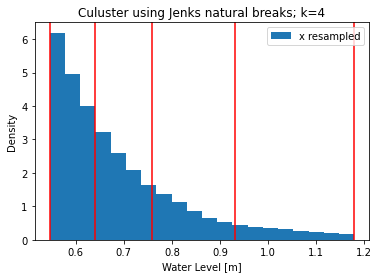

In [3]:
x_min = 0.722
x_max = 1.5
N = 10000

network.return_period.update_return_period("return_period.csv")
n_clusters = 4
#fc = network.fragilityCurves['tower_water']
fc = network.fragilityCurves['tower_water_lin']

water_level_resampled, bins = network.return_period.stratify(x_min,x_max,N, fc, n_clusters)

plt.hist(np.hstack(water_level_resampled), bins=20 ,density=True, label='x resampled')
for b in bins:
    plt.axvline(x = b, color = 'r')
    
plt.ylabel('Density')
plt.xlabel('Water Level [m]')
plt.title('Culuster using Jenks natural breaks; k=4')
plt.legend()

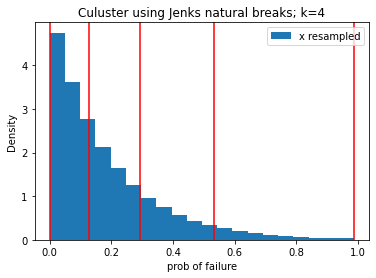

In [4]:
probability_of_failure_resampled2, bins2 = network.return_period.stratify_old(x_min,x_max,N, fc, n_clusters)

plt.hist(np.hstack(probability_of_failure_resampled2), bins=20 ,density=True, label='x resampled')
for b in bins2:
    plt.axvline(x = b, color = 'r')
    
plt.ylabel('Density')
plt.xlabel('prob of failure')
plt.title('Culuster using Jenks natural breaks; k=4')
plt.legend()

In [5]:
fc.interpolate(bins)

array([0.        , 0.        , 0.04711535, 0.26789287, 0.58712428])